# Pre-Porcessing

In [1]:
pwd

'/Users/mm/Desktop/klienProgram/c_dee_v2'

In [2]:
pip install pandas openpyxl scikit-learn xgboost


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Cek Dataset

In [43]:
import pandas as pd
file_path = "dataset/gabungan_20250418.xlsx"
df = pd.read_excel(file_path)
(df.head(50))


,No,Username,Comment,Date,Likes,url_post,Bobot
0,1.0,pertamina,pertamina\n 6d\nTahun ini pemerintah bakal mem...,2025-03-22,0.0,https://www.instagram.com/p/DHadEO0B5n4/,1
1,2.0,pertamina,komartii_,2025-03-22,10.0,https://www.instagram.com/p/DHadEO0B5n4/,1
2,3.0,komartii_,emang bener ya bakal ada diskon bbm pas lebara...,2025-03-22,0.0,https://www.instagram.com/p/DHadEO0B5n4/,1
3,4.0,angeelsamosirr,angeelsamosirr,2025-03-22,0.0,https://www.instagram.com/p/DHadEO0B5n4/,1
4,5.0,faismstfaa,iya alhamdulillah 😌,2025-03-22,0.0,https://www.instagram.com/p/DHadEO0B5n4/,2
5,6.0,mutiarasaptri,faismstfaa,2025-03-22,0.0,https://www.instagram.com/p/DHadEO0B5n4/,1
6,7.0,tikaaa.nfza,"nah gini dong, sip",2025-03-22,0.0,https://www.instagram.com/p/DHadEO0B5n4/,2
7,8.0,hansoheemu,mutiarasaptri,2025-03-22,0.0,https://www.instagram.com/p/DHadEO0B5n4/,1
8,9.0,fadil.fatahm,semangat memperbaiki lah intinya,2025-03-22,0.0,https://www.instagram.com/p/DHadEO0B5n4/,2
9,10.0,m.abdlghofar,tikaaa.nfza,2025-03-22,0.0,https://www.instagram.com/p/DHadEO0B5n4/,1


In [44]:
import pandas as pd

file_path = 'dataset/gabungan_20250418.xlsx'
df = pd.read_excel(file_path)

print("Nama-nama kolom:")
print(df.columns.tolist())

filtered_df = df[df['Bobot'].isin([0, 1, 2])]
bobot_counts = filtered_df['Bobot'].value_counts().sort_index()
lainnya = df[~df['Bobot'].isin([0, 1, 2]) & df['Bobot'].notna()].shape[0]
kosong = df['Bobot'].isna().sum()
print("Jumlah data berdasarkan nilai 'Bobot':")
for value in [0, 1, 2]:
    count = bobot_counts.get(value, 0)
    print(f"Bobot {value}: {count} data")
print(f"Bobot kosong: {kosong} data")
print(f"Bobot lain-lain: {lainnya} data")

Nama-nama kolom:
['No', 'Username', 'Comment', 'Date', 'Likes', 'url_post', 'Bobot']
Jumlah data berdasarkan nilai 'Bobot':
Bobot 0: 363 data
Bobot 1: 674 data
Bobot 2: 138 data
Bobot kosong: 0 data
Bobot lain-lain: 0 data


## Hapus baris dengan Bobot yang tidak bernilai

In [45]:
import pandas as pd

file_path = 'dataset/gabungan_20250418.xlsx'

df = pd.read_excel(file_path)

df_cleaned = df[df['Bobot'].isin([0, 1, 2])].dropna(subset=['Bobot'])

df_cleaned.to_excel(file_path, index=False)

print(f"Data telah dibersihkan dan disimpan kembali ke {file_path}.")

Data telah dibersihkan dan disimpan kembali ke dataset/gabungan_20250418.xlsx.


## Hapus Kolom selain Comment dan Bobot

In [46]:
file_path = 'dataset/gabungan_20250418.xlsx'
df = pd.read_excel(file_path)

df_filtered = df[['Comment', 'Bobot']]

output_path = 'dataset/dataset_2.xlsx'
df_filtered.to_excel(output_path, index=False)

import pandas as pd

file_path = "dataset/dataset_2.xlsx"

df = pd.read_excel(file_path)

(df.head(50))

,Comment,Bobot
0,pertamina\n 6d\nTahun ini pemerintah bakal mem...,1
1,komartii_,1
2,emang bener ya bakal ada diskon bbm pas lebara...,1
3,angeelsamosirr,1
4,iya alhamdulillah 😌,2
5,faismstfaa,1
6,"nah gini dong, sip",2
7,mutiarasaptri,1
8,semangat memperbaiki lah intinya,2
9,tikaaa.nfza,1


## Lowercasing (Mengubah Huruf besar ke huruf kecil)

In [47]:

file_path = 'dataset/dataset_2.xlsx'
df = pd.read_excel(file_path)

df['Comment'] = df['Comment'].str.lower()

output_path = 'dataset/dataset_2_lowercase.xlsx'
df.to_excel(output_path, index=False)

(df.head(50))

,Comment,Bobot
0,pertamina\n 6d\ntahun ini pemerintah bakal mem...,1
1,komartii_,1
2,emang bener ya bakal ada diskon bbm pas lebara...,1
3,angeelsamosirr,1
4,iya alhamdulillah 😌,2
5,faismstfaa,1
6,"nah gini dong, sip",2
7,mutiarasaptri,1
8,semangat memperbaiki lah intinya,2
9,tikaaa.nfza,1


## Punctuation Removal (Menghapus tanda baca)

In [48]:
import string
file_path = 'dataset/dataset_2_lowercase.xlsx'
df = pd.read_excel(file_path)

def remove_punctuation(text):
    if isinstance(text, str):
        return text.translate(str.maketrans('', '', string.punctuation))
    return text

df['Comment'] = df['Comment'].apply(remove_punctuation)

output_path = 'dataset/dataset_3_punctual_cleaned.xlsx'
df.to_excel(output_path, index=False)

print("Isi DataFrame setelah menghapus tanda baca:")
df

Isi DataFrame setelah menghapus tanda baca:


,Comment,Bobot
0,pertamina\n 6d\ntahun ini pemerintah bakal mem...,1
1,komartii,1
2,emang bener ya bakal ada diskon bbm pas lebara...,1
3,angeelsamosirr,1
4,iya alhamdulillah 😌,2
...,...,...
1170,pencuri,0
1171,pencuri,0
1172,bubarkan pertamina,1
1173,bubarkan pertamina\nbubarkan pertamina\nbubark...,1


## Number Removal (Menghapus Angka)

In [49]:
import re
file_path = 'dataset/dataset_3_punctual_cleaned.xlsx'
df = pd.read_excel(file_path)

def remove_numbers(text):
    if isinstance(text, str):
        return re.sub(r'\d+', '', text)
    return text

df['Comment'] = df['Comment'].apply(remove_numbers)

output_path = 'dataset/dataset_4_no_numbers.xlsx'
df.to_excel(output_path, index=False)

print("Isi DataFrame setelah menghapus angka:")
df

Isi DataFrame setelah menghapus angka:


,Comment,Bobot
0,pertamina\n d\ntahun ini pemerintah bakal memb...,1
1,komartii,1
2,emang bener ya bakal ada diskon bbm pas lebara...,1
3,angeelsamosirr,1
4,iya alhamdulillah 😌,2
...,...,...
1170,pencuri,0
1171,pencuri,0
1172,bubarkan pertamina,1
1173,bubarkan pertamina\nbubarkan pertamina\nbubark...,1


### Space Delete (Menghapus spasi berlebih)

In [50]:
file_path = 'dataset/dataset_4_no_numbers.xlsx'
df = pd.read_excel(file_path)

def clean_extra_spaces(text):
    if isinstance(text, str):
        text = text.strip()  # hapus spasi di awal dan akhir
        text = re.sub(r'\s+', ' ', text)  # ganti banyak spasi dengan satu spasi
        return text
    return text

df['Comment'] = df['Comment'].apply(clean_extra_spaces)

output_path = 'dataset/dataset_5_clean_spaces.xlsx'
df.to_excel(output_path, index=False)

print("Isi DataFrame setelah membersihkan spasi berlebih:")
df

Isi DataFrame setelah membersihkan spasi berlebih:


,Comment,Bobot
0,pertamina d tahun ini pemerintah bakal memberi...,1
1,komartii,1
2,emang bener ya bakal ada diskon bbm pas lebara...,1
3,angeelsamosirr,1
4,iya alhamdulillah 😌,2
...,...,...
1170,pencuri,0
1171,pencuri,0
1172,bubarkan pertamina,1
1173,bubarkan pertamina bubarkan pertamina bubarkan...,1


## Emoji Delete (Menghapus Emoji)

In [51]:
file_path = 'dataset/dataset_5_clean_spaces.xlsx'
df = pd.read_excel(file_path)

def remove_emoji(text):
    emoji_pattern = re.compile("[^\x00-\x7F]+")
    return re.sub(emoji_pattern, '', text)

df['Comment'] = df['Comment'].apply(remove_emoji)

output_path = 'dataset/dataset_6_no_emoji.xlsx'
df.to_excel(output_path, index=False)

print("Isi DataFrame setelah menghapus emoji atau karakter tidak terbaca:")
df


Isi DataFrame setelah menghapus emoji atau karakter tidak terbaca:


,Comment,Bobot
0,pertamina d tahun ini pemerintah bakal memberi...,1
1,komartii,1
2,emang bener ya bakal ada diskon bbm pas lebara...,1
3,angeelsamosirr,1
4,iya alhamdulillah,2
...,...,...
1170,pencuri,0
1171,pencuri,0
1172,bubarkan pertamina,1
1173,bubarkan pertamina bubarkan pertamina bubarkan...,1


## Delete Stopword

In [52]:
import pandas as pd

file_path = 'dataset/dataset_6_no_emoji.xlsx'  # Sesuaikan dengan path yang benar
df = pd.read_excel(file_path)

with open('stopwords/indonesian', 'r', encoding='utf-8') as f:
    stop_words = set(line.strip() for line in f if line.strip())

print("Jumlah stopwords:", len(stop_words))
print("Beberapa stopwords:", list(stop_words)[:10])

def remove_stopwords(text):
    text = str(text)  # Konversi ke string
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

df['Comment'] = df['Comment'].apply(remove_stopwords)

output_path = 'dataset/dataset_7_no_stopwords.xlsx'  # Sesuaikan dengan path yang benar
df.to_excel(output_path, index=False)

# Tampilkan hasil (5 baris pertama)
df


Jumlah stopwords: 757
Beberapa stopwords: ['dari', 'dialah', 'wong', 'katakan', 'ditunjuk', 'menanyai', 'ujarnya', 'sebaik', 'dimulainya', 'berdatangan']


,Comment,Bobot
0,pertamina d pemerintah pemeriksaan kesehatan g...,1
1,komartii,1
2,emang bener ya diskon bbm pas lebaran,1
3,angeelsamosirr,1
4,iya alhamdulillah,2
...,...,...
1170,pencuri,0
1171,pencuri,0
1172,bubarkan pertamina,1
1173,bubarkan pertamina bubarkan pertamina bubarkan...,1


## Cek dataset

In [53]:
import pandas as pd

file_path = 'dataset/dataset_7_no_stopwords.xlsx'
df = pd.read_excel(file_path)

print("Nama-nama kolom:")
print(df.columns.tolist())

bobot_counts = df['Bobot'].value_counts().sort_index()
print("Jumlah data berdasarkan nilai 'Bobot':")
for value in [0, 1, 2]:
    count = bobot_counts.get(value, 0)
    print(f"Bobot {value}: {count} data")

Nama-nama kolom:
['Comment', 'Bobot']
Jumlah data berdasarkan nilai 'Bobot':
Bobot 0: 363 data
Bobot 1: 674 data
Bobot 2: 138 data


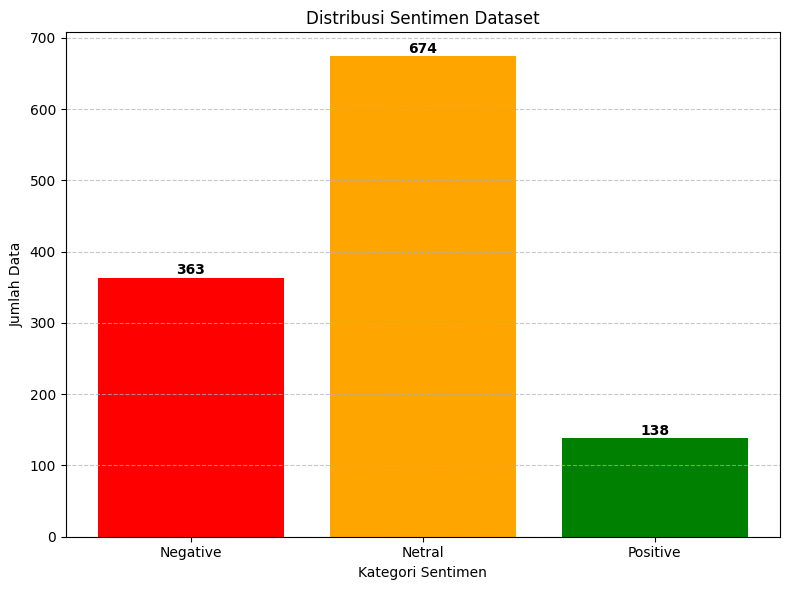

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data
file_path = 'dataset/dataset_7_no_stopwords.xlsx'
df = pd.read_excel(file_path)

# Menghitung jumlah data berdasarkan nilai 'Bobot'
bobot_counts = df['Bobot'].value_counts().sort_index()

# Mapping label dan warna
label_map = {
    0: 'Negative',
    1: 'Netral',
    2: 'Positive'
}
colors = {
    0: 'red',
    1: 'orange',
    2: 'green'
}

# Siapkan data untuk plotting
indices = [0, 1, 2]
labels = [label_map[i] for i in indices]
counts = [bobot_counts.get(i, 0) for i in indices]
bar_colors = [colors[i] for i in indices]

# Membuat grafik batang
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, counts, color=bar_colors)

# Menambahkan nilai di atas batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1,  # posisi teks sedikit di atas batang
             f'{int(yval)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Tambahan elemen visual
plt.title("Distribusi Sentimen Dataset")
plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Data")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Training xgboost

In [54]:
pip install --force-reinstall --no-cache-dir xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 1.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 433.2 kB/s eta 0:00:0000:0200:03
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
  Attempting uninstall: xgboost
    Found existing installation: xgboost 3.0.1
    Uninstalling xgboost-3.0.1:
      Successfully uninstalled xgboost-3.0.1

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:15:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== Evaluasi Model Sentiment Analysis (XGBoost) ===
Accuracy     : 0.7511
F1 Score     : 0.7374

Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.55      0.67        73
     Neutral       0.74      0.92      0.82       133
    Positive       0.63      0.44      0.52        27

    accuracy                           0.75       233
   macro avg       0.74      0.64      0.67       233
weighted avg       0.76      0.75      0.74       233



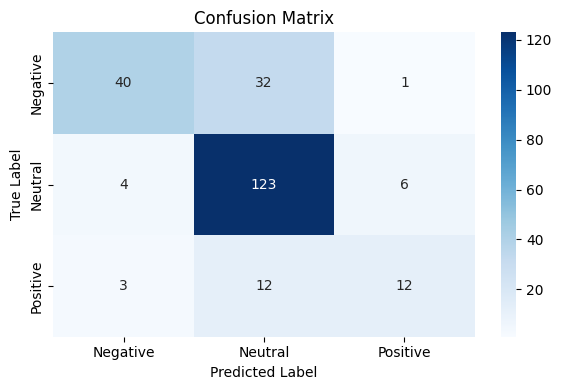

['model/tfidf_vectorizer.pkl']

In [56]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Baca dataset
file_path = 'dataset/dataset_7_no_stopwords.xlsx'
df = pd.read_excel(file_path)

# 2. Hapus baris dengan nilai NaN pada kolom 'Comment' atau 'Bobot'
df = df.dropna(subset=['Comment', 'Bobot'])

# 3. Pastikan kolom dalam format yang sesuai
X = df['Comment'].astype(str)
y = df['Bobot'].astype(int)

# 4. TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Train XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# 7. Prediksi
y_pred = model.predict(X_test)

# 8. Evaluasi
labels = [0, 1, 2]  # pastikan urutan label sesuai: 0=Negative, 1=Neutral, 2=Positive
target_names = ['Negative', 'Neutral', 'Positive']

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred, labels=labels)

print("=== Evaluasi Model Sentiment Analysis (XGBoost) ===")
print(f"Accuracy     : {acc:.4f}")
print(f"F1 Score     : {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=labels, target_names=target_names))

# 9. Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# 10. Simpan model dan vectorizer
joblib.dump(model, 'model/xgboost_sentiment_model.pkl')
joblib.dump(vectorizer, 'model/tfidf_vectorizer.pkl')


In [57]:
import platform
platform.architecture()

('64bit', '')

# Prediksi

In [3]:
import joblib
import numpy as np

model_path = 'model/xgboost_sentiment_model.pkl'
vectorizer_path = 'model/tfidf_vectorizer.pkl'

model = joblib.load(model_path)
vectorizer = joblib.load(vectorizer_path)

komentar = "tukang oplosan"

komentar_clean = komentar.lower()

X_input = vectorizer.transform([komentar_clean])

prediksi_label = model.predict(X_input)[0]
prediksi_proba = model.predict_proba(X_input)[0]  # array probabilitas

label_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
prediksi_kategori = label_mapping[prediksi_label]
confidence = np.max(prediksi_proba)

print(f"Komentar            : {komentar}")
print(f"Prediksi Sentimen   : {prediksi_kategori}")
print(f"Confidence Score    : {confidence * 100:.2f}%")

Komentar            : tukang oplosan
Prediksi Sentimen   : Negative
Confidence Score    : 96.01%


# Prediksi data

## 01_twetter

✓ Selesai memproses: 2025-02-21_1892807278908031394.xlsx → 2025-02-21_1892807278908031394_prediksi.xlsx
✓ Selesai memproses: 2025-03-30_1906312569289367688.xlsx → 2025-03-30_1906312569289367688_prediksi.xlsx
✓ Selesai memproses: 2025-02-19_1892057558082318364.xlsx → 2025-02-19_1892057558082318364_prediksi.xlsx
✓ Selesai memproses: 2025-02-20_1892497998749348071.xlsx → 2025-02-20_1892497998749348071_prediksi.xlsx
✓ Selesai memproses: 2025-02-03_1886344755090772180.xlsx → 2025-02-03_1886344755090772180_prediksi.xlsx
✓ Selesai memproses: 2025-02-21_1892881143500066863.xlsx → 2025-02-21_1892881143500066863_prediksi.xlsx
✓ Selesai memproses: 2025-02-19_1892057555482063158.xlsx → 2025-02-19_1892057555482063158_prediksi.xlsx
✓ Selesai memproses: 2025-02-18_1891740749361733674.xlsx → 2025-02-18_1891740749361733674_prediksi.xlsx
✓ Selesai memproses: 2025-02-18_1891740746878747042.xlsx → 2025-02-18_1891740746878747042_prediksi.xlsx
✓ Selesai memproses: 2025-02-24_1893876429252653061.xlsx → 2025-

/var/folders/xg/nsr28y797rj6ylbvy7_jyvrw0000gn/T/ipykernel_2458/3168746801.py:80: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(all_dfs, ignore_index=True)


File gabungan berhasil disimpan di: hasil_prediksi_gabungan/01_twetter.xlsx
Data agregasi per tanggal berhasil disimpan di: hasil_per_tanggal/01_twetter_aggregated_per_date.xlsx


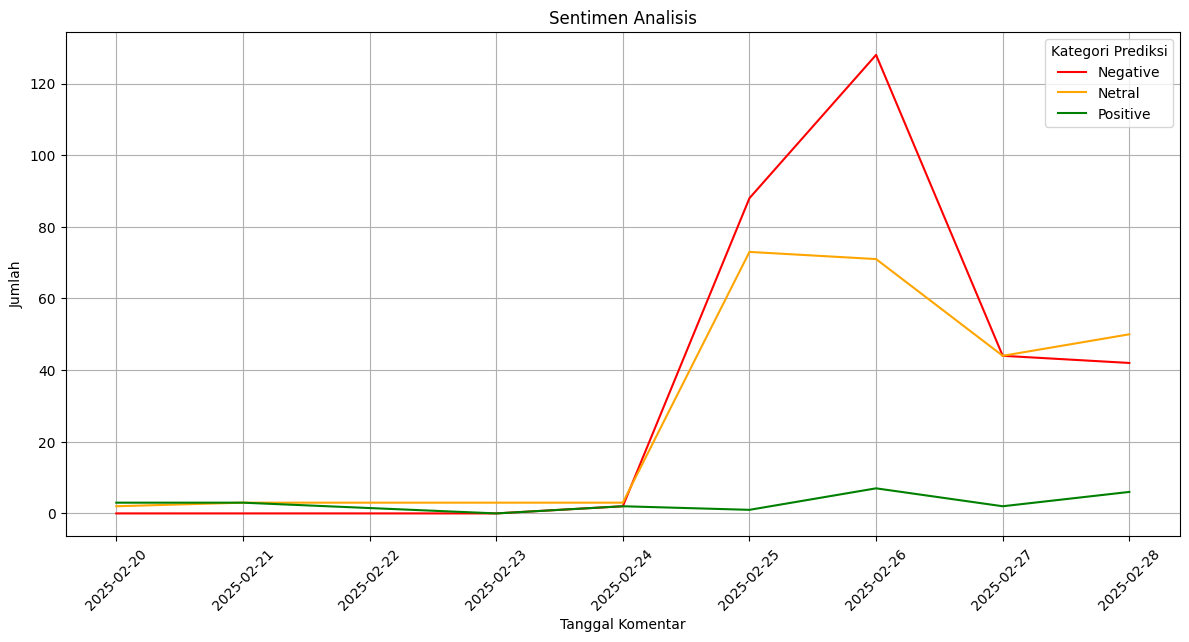

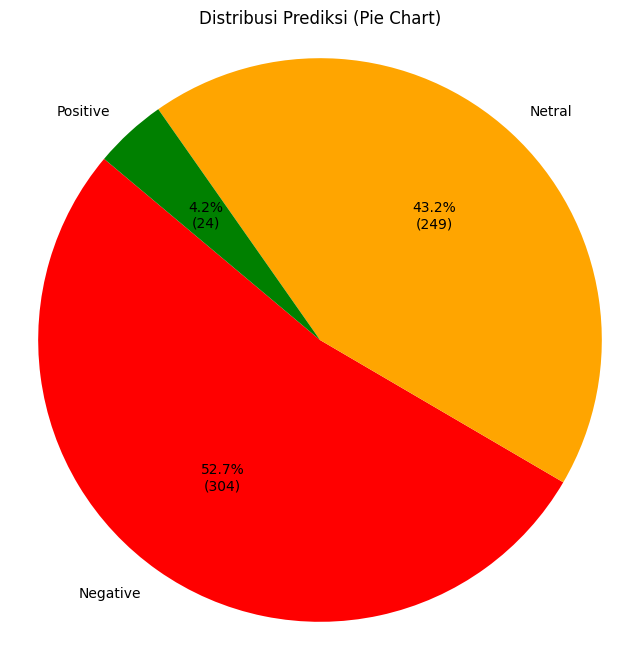

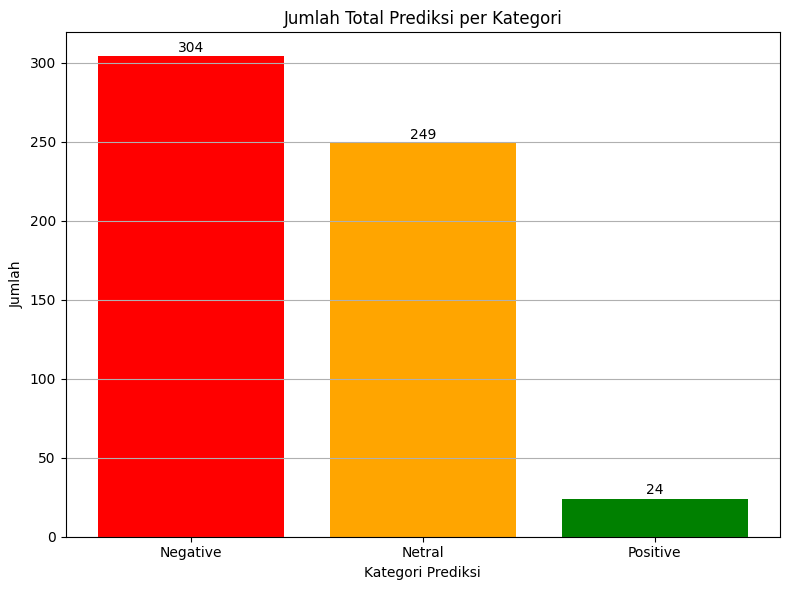

In [1]:
import os
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt

# === Bagian 1: Prediksi Sentimen dengan Filter Tanggal ===
model_path = 'model/xgboost_sentiment_model.pkl'
vectorizer_path = 'model/tfidf_vectorizer.pkl'

model = joblib.load(model_path)
vectorizer = joblib.load(vectorizer_path)

input_folder = 'prediksi/01_twetter'
output_folder = 'hasil_prediksi/01_twetter'

os.makedirs(output_folder, exist_ok=True)

excel_files = [f for f in os.listdir(input_folder) if f.endswith(('.xls', '.xlsx'))]

kolom_komentar = 'Comment'
kolom_tanggal = 'Date'

start_date = pd.to_datetime('2025-02-20').date()
end_date = pd.to_datetime('2025-02-28').date()

def predict_sentiment(text):
    if pd.isna(text):
        return np.nan
    text_clean = str(text).lower()
    tfidf_vector = vectorizer.transform([text_clean])
    pred_label = model.predict(tfidf_vector)[0]
    return int(pred_label)

for file_name in excel_files:
    input_path = os.path.join(input_folder, file_name)
    try:
        df = pd.read_excel(input_path)

        if kolom_tanggal in df.columns:
            df[kolom_tanggal] = pd.to_datetime(df[kolom_tanggal]).dt.date
            df = df[(df[kolom_tanggal] >= start_date) & (df[kolom_tanggal] <= end_date)]
        else:
            print(f"Kolom '{kolom_tanggal}' tidak ditemukan di file: {file_name}")
            continue

        if kolom_komentar not in df.columns:
            print(f"Kolom '{kolom_komentar}' tidak ditemukan di file: {file_name}")
            continue

        df['Prediksi'] = df[kolom_komentar].apply(predict_sentiment)

        output_name = file_name.replace('.xlsx', '').replace('.xls', '') + '_prediksi.xlsx'
        output_path = os.path.join(output_folder, output_name)
        df.to_excel(output_path, index=False)

        print(f"✓ Selesai memproses: {file_name} → {output_name}")
    except Exception as e:
        print(f"✗ Gagal memproses {file_name}: {e}")

# === Bagian 2: Gabungkan Semua File Hasil Prediksi ===
output_folder_gabungan = 'hasil_prediksi_gabungan'
output_file = '01_twetter.xlsx'
os.makedirs(output_folder_gabungan, exist_ok=True)

all_dfs = []

for filename in os.listdir(output_folder):
    file_path = os.path.join(output_folder, filename)
    if filename.endswith('.csv'):
        df = pd.read_csv(file_path)
        all_dfs.append(df)
    elif filename.endswith(('.xlsx', '.xls')):
        df = pd.read_excel(file_path)
        all_dfs.append(df)
    elif filename.endswith('.txt'):
        df = pd.read_csv(file_path, delimiter='\t')
        all_dfs.append(df)

combined_df = pd.concat(all_dfs, ignore_index=True)

output_path = os.path.join(output_folder_gabungan, output_file)
combined_df.to_excel(output_path, index=False)

print(f'File gabungan berhasil disimpan di: {output_path}')

# === Bagian 3: Visualisasi Agregasi Prediksi per Tanggal ===
file_path = output_path
df = pd.read_excel(file_path)
df['Date'] = pd.to_datetime(df['Date']).dt.date

count_per_day = df.groupby(['Date', 'Prediksi']).size().unstack(fill_value=0)
count_per_day = count_per_day.sort_index()

# Simpan agregasi per tanggal
os.makedirs('hasil_per_tanggal', exist_ok=True)
aggregated_output_path = os.path.join('hasil_per_tanggal', '01_twetter_aggregated_per_date.xlsx')
count_per_day.to_excel(aggregated_output_path)
print(f'Data agregasi per tanggal berhasil disimpan di: {aggregated_output_path}')

# === Bagian 4: Visualisasi Line Chart Sentimen ===
color_map = {0: 'red', 1: 'orange', 2: 'green'}
label_map = {0: 'Negative', 1: 'Netral', 2: 'Positive'}

plt.figure(figsize=(12, 6))
for label in count_per_day.columns:
    if label in color_map:
        plt.plot(count_per_day.index, count_per_day[label], label=label_map[label], color=color_map[label])

plt.title('Sentimen Analisis')
plt.xlabel('Tanggal Komentar')
plt.ylabel('Jumlah')
plt.legend(title='Kategori Prediksi')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# === Bagian 5: Pie Chart Distribusi Prediksi ===
def autopct_format(pct, all_vals):
    absolute = int(round(pct/100.*sum(all_vals)))
    return f'{pct:.1f}%\n({absolute})'

total_prediksi = df['Prediksi'].value_counts().sort_index()
filtered_prediksi = total_prediksi[total_prediksi.index.isin([0, 1, 2])]

colors = [color_map[i] for i in filtered_prediksi.index]
labels = [f'{label_map[i]}' for i in filtered_prediksi.index]

plt.figure(figsize=(8, 8))
plt.pie(
    filtered_prediksi,
    labels=labels,
    colors=colors,
    autopct=lambda pct: autopct_format(pct, filtered_prediksi),
    startangle=140
)
plt.title('Distribusi Prediksi (Pie Chart)')
plt.axis('equal')
plt.show()

# === Bagian 6: Bar Chart Distribusi Prediksi ===
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, filtered_prediksi.values, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

plt.title('Jumlah Total Prediksi per Kategori')
plt.xlabel('Kategori Prediksi')
plt.ylabel('Jumlah')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## 02_instagram

✓ Selesai memproses: 2025-02-24_DGcQda-h2Bh.xlsx → 2025-02-24_DGcQda-h2Bh_prediksi.xlsx
✓ Selesai memproses: 2025-02-10_DF39QHQBEel.xlsx → 2025-02-10_DF39QHQBEel_prediksi.xlsx
✓ Selesai memproses: 2025-02-08_DF0GtVay44s.xlsx → 2025-02-08_DF0GtVay44s_prediksi.xlsx
✓ Selesai memproses: 2025-03-27_DHsvyYXhlQh.xlsx → 2025-03-27_DHsvyYXhlQh_prediksi.xlsx
✓ Selesai memproses: 2025-02-14_DGDP4OhhIIc.xlsx → 2025-02-14_DGDP4OhhIIc_prediksi.xlsx
✓ Selesai memproses: 2025-02-13_DGAvYdnBRBD.xlsx → 2025-02-13_DGAvYdnBRBD_prediksi.xlsx
✓ Selesai memproses: 2025-02-28_DGnn2HkB4vG.xlsx → 2025-02-28_DGnn2HkB4vG_prediksi.xlsx
✓ Selesai memproses: 2025-02-22_DGYIa10hIKP.xlsx → 2025-02-22_DGYIa10hIKP_prediksi.xlsx
✓ Selesai memproses: 2025-03-18_DHVUdxwxoNs.xlsx → 2025-03-18_DHVUdxwxoNs_prediksi.xlsx
✓ Selesai memproses: 2025-03-30_DH0bAIEh93N.xlsx → 2025-03-30_DH0bAIEh93N_prediksi.xlsx
✓ Selesai memproses: 2025-02-19_DGO7Z7NhQS1.xlsx → 2025-02-19_DGO7Z7NhQS1_prediksi.xlsx
✓ Selesai memproses: 2025-03-08_

/var/folders/xg/nsr28y797rj6ylbvy7_jyvrw0000gn/T/ipykernel_2458/1095575583.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(all_dfs, ignore_index=True)


File gabungan berhasil disimpan di: hasil_prediksi_gabungan/02_instagram.xlsx
Data agregasi per tanggal berhasil disimpan di: hasil_per_tanggal/02_instagram_aggregated_per_date.xlsx


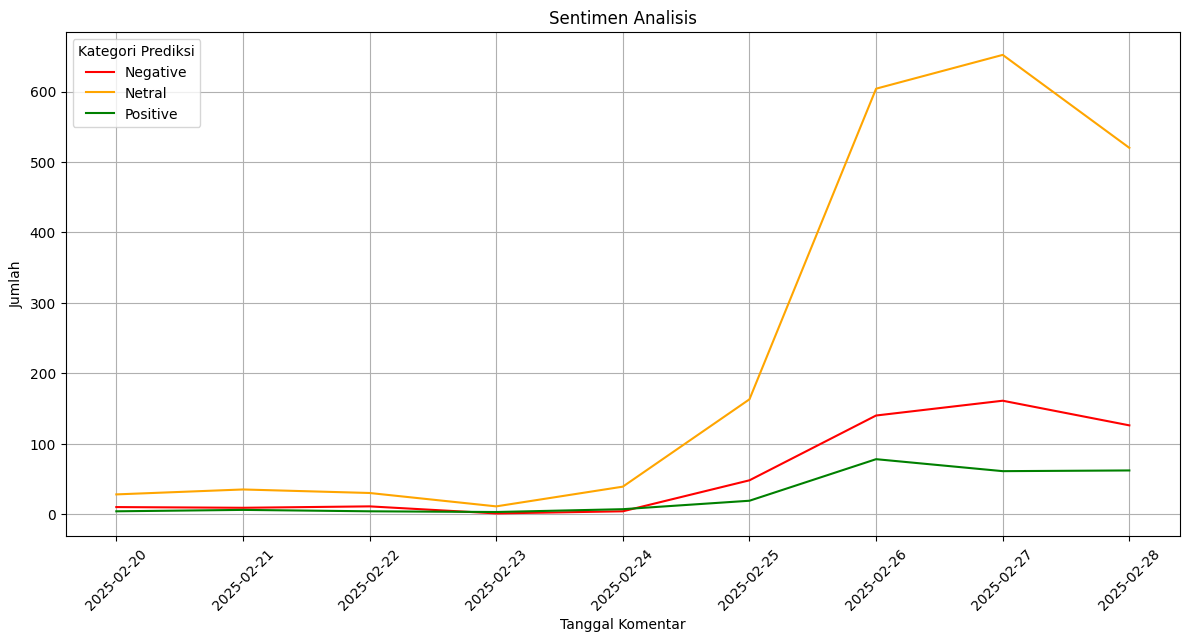

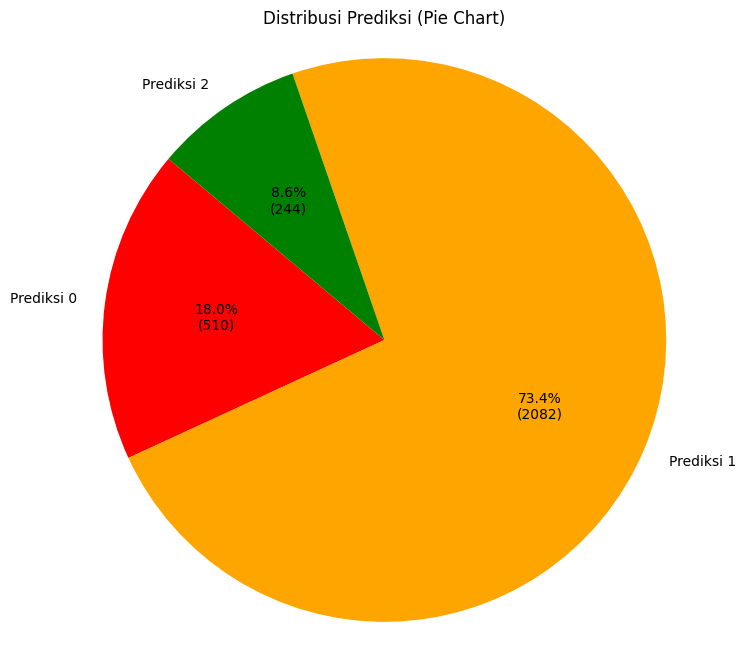

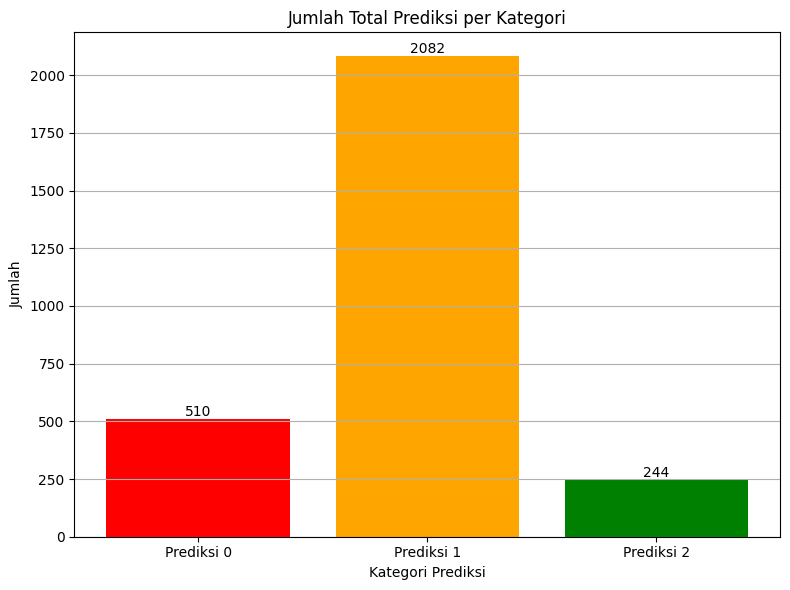

In [2]:
# === Bagian 1: Prediksi Sentimen dengan Filter Tanggal ===
import os
import pandas as pd
import joblib
import numpy as np

model_path = 'model/xgboost_sentiment_model.pkl'
vectorizer_path = 'model/tfidf_vectorizer.pkl'

model = joblib.load(model_path)
vectorizer = joblib.load(vectorizer_path)

input_folder = 'prediksi/02_instagram'
output_folder = 'hasil_prediksi/02_instagram'

os.makedirs(output_folder, exist_ok=True)

excel_files = [f for f in os.listdir(input_folder) if f.endswith(('.xls', '.xlsx'))]

kolom_komentar = 'Comment'
kolom_tanggal = 'Date'

start_date = pd.to_datetime('2025-02-20').date()
end_date = pd.to_datetime('2025-02-28').date()

def predict_sentiment(text):
    if pd.isna(text):
        return np.nan
    text_clean = str(text).lower()
    tfidf_vector = vectorizer.transform([text_clean])
    pred_label = model.predict(tfidf_vector)[0]
    return int(pred_label)

for file_name in excel_files:
    input_path = os.path.join(input_folder, file_name)
    try:
        df = pd.read_excel(input_path)

        if kolom_tanggal in df.columns:
            df[kolom_tanggal] = pd.to_datetime(df[kolom_tanggal]).dt.date
            df = df[(df[kolom_tanggal] >= start_date) & (df[kolom_tanggal] <= end_date)]
        else:
            print(f"Kolom '{kolom_tanggal}' tidak ditemukan di file: {file_name}")
            continue

        if kolom_komentar not in df.columns:
            print(f"Kolom '{kolom_komentar}' tidak ditemukan di file: {file_name}")
            continue

        df['Prediksi'] = df[kolom_komentar].apply(predict_sentiment)

        output_name = file_name.replace('.xlsx', '').replace('.xls', '') + '_prediksi.xlsx'
        output_path = os.path.join(output_folder, output_name)
        df.to_excel(output_path, index=False)

        print(f"✓ Selesai memproses: {file_name} → {output_name}")
    except Exception as e:
        print(f"✗ Gagal memproses {file_name}: {e}")


# === Bagian 2: Hitung Total Prediksi ===
from collections import Counter

folder_path = 'hasil_prediksi/02_instagram'

excel_files = [f for f in os.listdir(folder_path) if f.endswith(('.xls', '.xlsx'))]

total_counter = Counter()

for file in excel_files:
    file_path = os.path.join(folder_path, file)
    try:
        df = pd.read_excel(file_path)
        if 'Prediksi' in df.columns:
            prediksi_values = df['Prediksi'].dropna()
            value_counts = prediksi_values.value_counts()

            invalid_values = prediksi_values[~prediksi_values.isin([0, 1, 2])]
            if not invalid_values.empty:
                print(f"Nilai tidak valid: {invalid_values.unique()} (jumlah: {len(invalid_values)})")

            filtered = prediksi_values[prediksi_values.isin([0, 1, 2])]
            total_counter.update(filtered)
        else:
            print(f"\nFile: {file} — Kolom 'Prediksi' tidak ditemukan.")
    except Exception as e:
        print(f"\nGagal membaca file {file}: {e}")


# === Bagian 3: Gabungkan Semua File ===
os.makedirs('hasil_prediksi_gabungan', exist_ok=True)
input_folder = 'hasil_prediksi/02_instagram'
output_path = 'hasil_prediksi_gabungan/02_instagram.xlsx'

all_dfs = []

for filename in os.listdir(input_folder):
    file_path = os.path.join(input_folder, filename)
    if filename.endswith('.csv'):
        df = pd.read_csv(file_path)
        all_dfs.append(df)
    elif filename.endswith(('.xlsx', '.xls')):
        df = pd.read_excel(file_path)
        all_dfs.append(df)
    elif filename.endswith('.txt'):
        df = pd.read_csv(file_path, delimiter='\t')
        all_dfs.append(df)

combined_df = pd.concat(all_dfs, ignore_index=True)
combined_df.to_excel(output_path, index=False)

print(f'File gabungan berhasil disimpan di: {output_path}')


# === Bagian 4: Visualisasi Sentimen per Tanggal ===
import matplotlib.pyplot as plt

file_path = 'hasil_prediksi_gabungan/02_instagram.xlsx'
df = pd.read_excel(file_path)
df['Date'] = pd.to_datetime(df['Date']).dt.date

count_per_day = df.groupby(['Date', 'Prediksi']).size().unstack(fill_value=0)
count_per_day = count_per_day.sort_index()

os.makedirs('hasil_per_tanggal', exist_ok=True)
aggregated_output_path = os.path.join('hasil_per_tanggal', '02_instagram_aggregated_per_date.xlsx')
count_per_day.to_excel(aggregated_output_path)
print(f'Data agregasi per tanggal berhasil disimpan di: {aggregated_output_path}')

color_map = {0: 'red', 1: 'orange', 2: 'green'}
label_map = {0: 'Negative', 1: 'Netral', 2: 'Positive'}

plt.figure(figsize=(12, 6))
for label in count_per_day.columns:
    if label in color_map:
        plt.plot(count_per_day.index, count_per_day[label], label=label_map[label], color=color_map[label])

plt.title('Sentimen Analisis')
plt.xlabel('Tanggal Komentar')
plt.ylabel('Jumlah')
plt.legend(title='Kategori Prediksi')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


# === Bagian 5: Visualisasi Pie dan Bar Chart ===
def autopct_format(pct, all_vals):
    absolute = int(round(pct/100.*sum(all_vals)))
    return f'{pct:.1f}%\n({absolute})'

total_prediksi = df['Prediksi'].value_counts().sort_index()
filtered_prediksi = total_prediksi[total_prediksi.index.isin([0, 1, 2])]

colors = [color_map[i] for i in filtered_prediksi.index]
labels = [f'Prediksi {i}' for i in filtered_prediksi.index]

plt.figure(figsize=(8, 8))
plt.pie(
    filtered_prediksi,
    labels=labels,
    colors=colors,
    autopct=lambda pct: autopct_format(pct, filtered_prediksi),
    startangle=140
)
plt.title('Distribusi Prediksi (Pie Chart)')
plt.axis('equal')
plt.show()

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, filtered_prediksi.values, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

plt.title('Jumlah Total Prediksi per Kategori')
plt.xlabel('Kategori Prediksi')
plt.ylabel('Jumlah')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 03_tiktok

✓ Selesai memproses: 2025-02-13_7470890485955988742.xlsx → 2025-02-13_7470890485955988742_prediksi.xlsx
✓ Selesai memproses: 2025-03-30_7487418661070785799.xlsx → 2025-03-30_7487418661070785799_prediksi.xlsx
✓ Selesai memproses: 2025-03-30_7487601803601661191.xlsx → 2025-03-30_7487601803601661191_prediksi.xlsx
✓ Selesai memproses: 2025-02-03_7467160703300947206.xlsx → 2025-02-03_7467160703300947206_prediksi.xlsx
✓ Selesai memproses: 2025-03-29_7486995962133499154.xlsx → 2025-03-29_7486995962133499154_prediksi.xlsx
✓ Selesai memproses: 2025-03-06_7478519251154849079.xlsx → 2025-03-06_7478519251154849079_prediksi.xlsx
✓ Selesai memproses: 2025-02-10_7469644791530130743.xlsx → 2025-02-10_7469644791530130743_prediksi.xlsx
✓ Selesai memproses: 2025-03-23_7484920331916840198.xlsx → 2025-03-23_7484920331916840198_prediksi.xlsx
✓ Selesai memproses: 2025-03-28_7486782429265513734.xlsx → 2025-03-28_7486782429265513734_prediksi.xlsx
✓ Selesai memproses: 2025-02-15_7471622102068497670.xlsx → 2025-

/var/folders/xg/nsr28y797rj6ylbvy7_jyvrw0000gn/T/ipykernel_2458/1855795743.py:88: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(all_dfs, ignore_index=True)


File gabungan berhasil disimpan di: hasil_prediksi_gabungan/03_tiktok.xlsx
Data agregasi per tanggal berhasil disimpan di: hasil_per_tanggal/03_tiktok_aggregated_per_date.xlsx


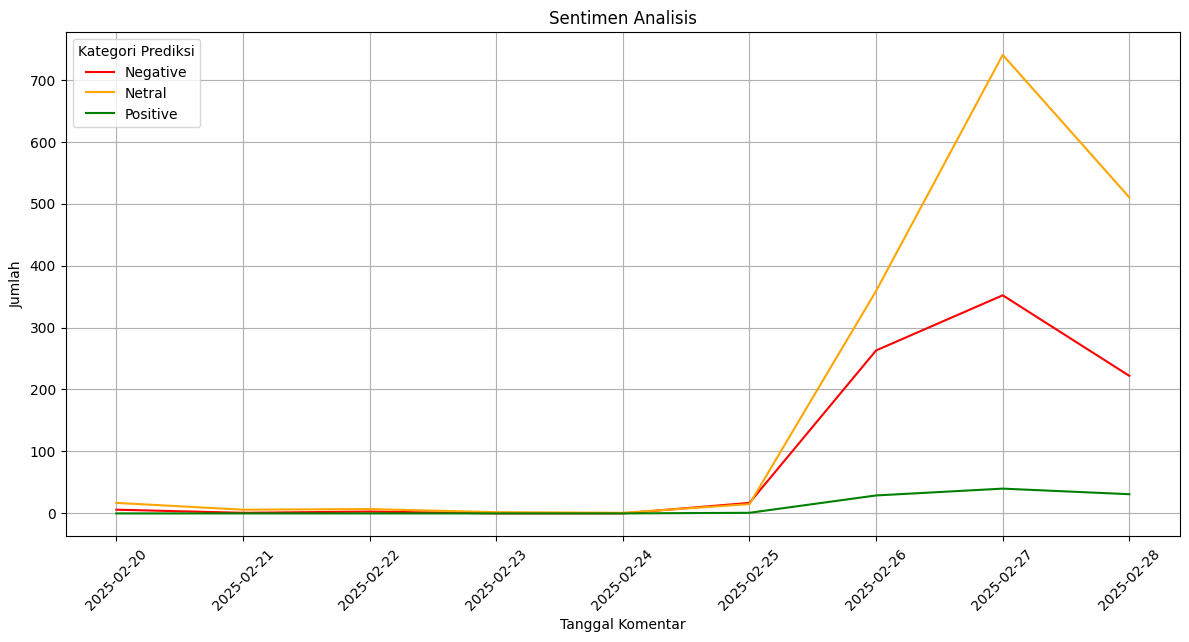

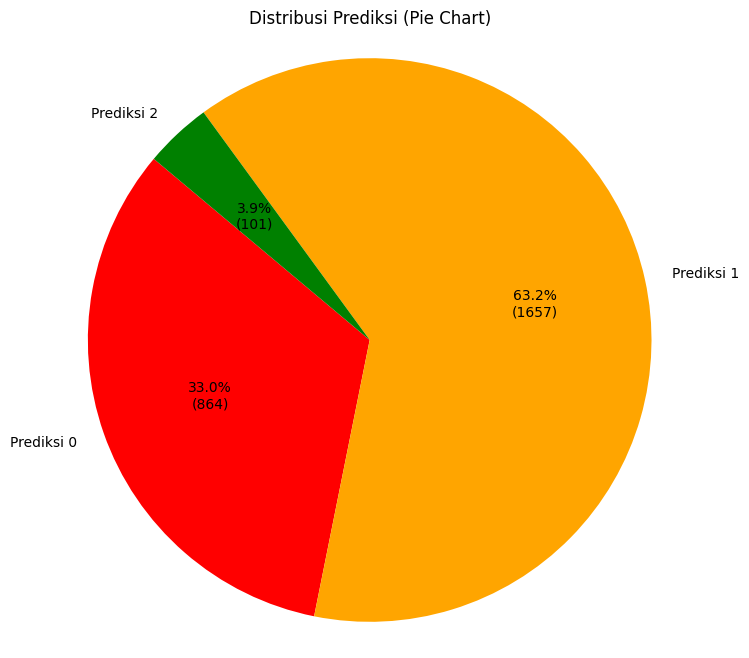

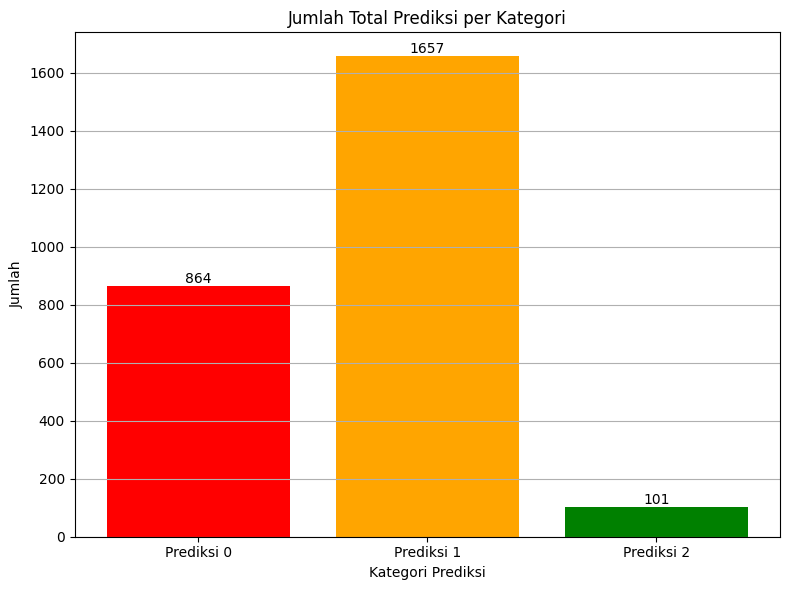

In [3]:
import os
import pandas as pd
import joblib
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# Load model dan vectorizer
model_path = 'model/xgboost_sentiment_model.pkl'
vectorizer_path = 'model/tfidf_vectorizer.pkl'
model = joblib.load(model_path)
vectorizer = joblib.load(vectorizer_path)

# Folder input dan output
input_folder = 'prediksi/03_tiktok'
output_folder = 'hasil_prediksi/03_tiktok'
os.makedirs(output_folder, exist_ok=True)

# Filter tanggal
start_date = pd.to_datetime('2025-02-20').date()
end_date = pd.to_datetime('2025-02-28').date()

excel_files = [f for f in os.listdir(input_folder) if f.endswith(('.xls', '.xlsx'))]
kolom_komentar = 'Comment'

# Fungsi prediksi

def predict_sentiment(text):
    if pd.isna(text):
        return np.nan
    text_clean = str(text).lower()
    tfidf_vector = vectorizer.transform([text_clean])
    pred_label = model.predict(tfidf_vector)[0]
    return int(pred_label)

# Proses setiap file
for file_name in excel_files:
    input_path = os.path.join(input_folder, file_name)
    try:
        df = pd.read_excel(input_path)
        if kolom_komentar not in df.columns:
            print(f"Kolom '{kolom_komentar}' tidak ditemukan di file: {file_name}")
            continue

        # Filter berdasarkan tanggal
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.date
            df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

        df['Prediksi'] = df[kolom_komentar].apply(predict_sentiment)

        output_name = file_name.replace('.xlsx', '').replace('.xls', '') + '_prediksi.xlsx'
        output_path = os.path.join(output_folder, output_name)
        df.to_excel(output_path, index=False)

        print(f"✓ Selesai memproses: {file_name} → {output_name}")
    except Exception as e:
        print(f"✗ Gagal memproses {file_name}: {e}")

# Rekap jumlah
folder_path = 'hasil_prediksi/03_tiktok'
total_counter = Counter()
excel_files = [f for f in os.listdir(folder_path) if f.endswith(('.xls', '.xlsx'))]

for file in excel_files:
    file_path = os.path.join(folder_path, file)
    try:
        df = pd.read_excel(file_path)
        if 'Prediksi' in df.columns:
            prediksi_values = df['Prediksi'].dropna()
            filtered = prediksi_values[prediksi_values.isin([0, 1, 2])]
            total_counter.update(filtered)
    except Exception as e:
        print(f"Gagal membaca file {file}: {e}")

# Gabungkan semua file hasil prediksi
input_folder = 'hasil_prediksi/03_tiktok'
output_folder = 'hasil_prediksi_gabungan'
os.makedirs(output_folder, exist_ok=True)
output_file = '03_tiktok.xlsx'

all_dfs = []
for filename in os.listdir(input_folder):
    file_path = os.path.join(input_folder, filename)
    if filename.endswith(('.xlsx', '.xls')):
        df = pd.read_excel(file_path)
        all_dfs.append(df)
combined_df = pd.concat(all_dfs, ignore_index=True)
output_path = os.path.join(output_folder, output_file)
combined_df.to_excel(output_path, index=False)
print(f'File gabungan berhasil disimpan di: {output_path}')

# Agregasi per tanggal dan visualisasi
file_path = output_path
df = pd.read_excel(file_path)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.date
count_per_day = df.groupby(['Date', 'Prediksi']).size().unstack(fill_value=0).sort_index()
aggregated_output_path = os.path.join('hasil_per_tanggal', '03_tiktok_aggregated_per_date.xlsx')
os.makedirs('hasil_per_tanggal', exist_ok=True)
count_per_day.to_excel(aggregated_output_path)
print(f'Data agregasi per tanggal berhasil disimpan di: {aggregated_output_path}')

# Visualisasi
color_map = {0: 'red', 1: 'orange', 2: 'green'}
label_map = {0: 'Negative', 1: 'Netral', 2: 'Positive'}

plt.figure(figsize=(12, 6))
for label in count_per_day.columns:
    if label in color_map:
        plt.plot(count_per_day.index, count_per_day[label], label=label_map[label], color=color_map[label])
plt.title('Sentimen Analisis')
plt.xlabel('Tanggal Komentar')
plt.ylabel('Jumlah')
plt.legend(title='Kategori Prediksi')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Pie chart
filtered_prediksi = df['Prediksi'].value_counts().sort_index().loc[[0, 1, 2]]
colors = [color_map[i] for i in filtered_prediksi.index]
labels = [f'Prediksi {i}' for i in filtered_prediksi.index]

plt.figure(figsize=(8, 8))
plt.pie(
    filtered_prediksi,
    labels=labels,
    colors=colors,
    autopct=lambda pct: f'{pct:.1f}%\n({int(round(pct/100.*sum(filtered_prediksi)))})',
    startangle=140
)
plt.title('Distribusi Prediksi (Pie Chart)')
plt.axis('equal')
plt.show()

# Bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, filtered_prediksi.values, color=colors)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}', ha='center', va='bottom')
plt.title('Jumlah Total Prediksi per Kategori')
plt.xlabel('Kategori Prediksi')
plt.ylabel('Jumlah')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Gabungan ketiga media sosial

Data perkembangan sentimen per tanggal berhasil disimpan di: hasil_per_tanggal/04_all_aggregated_per_date.xlsx


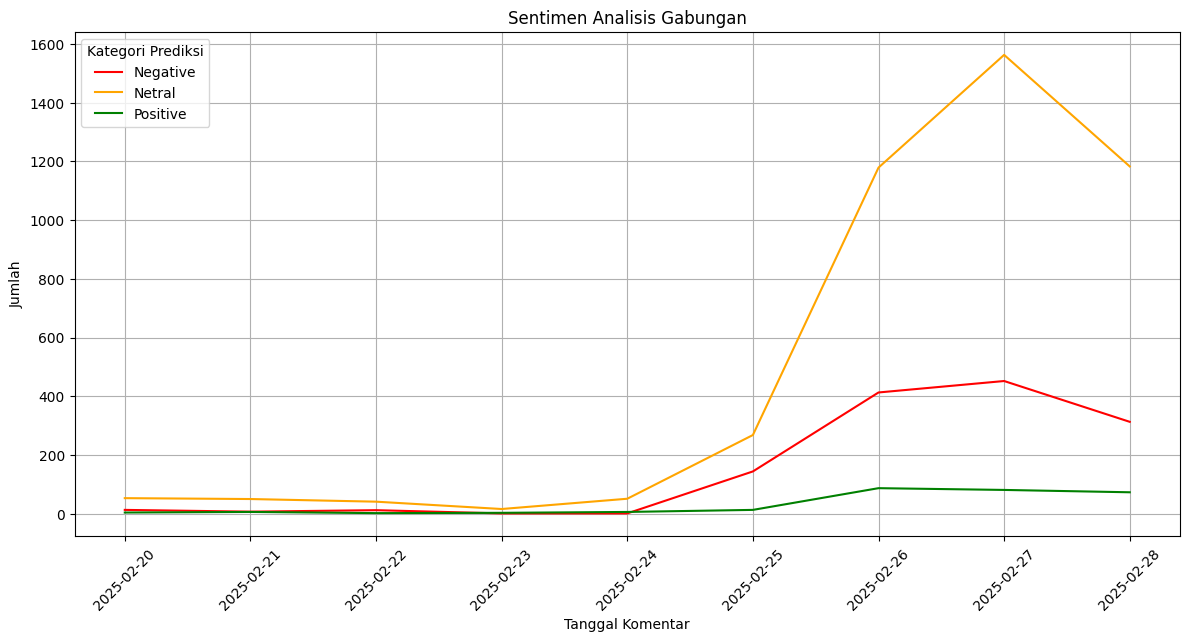

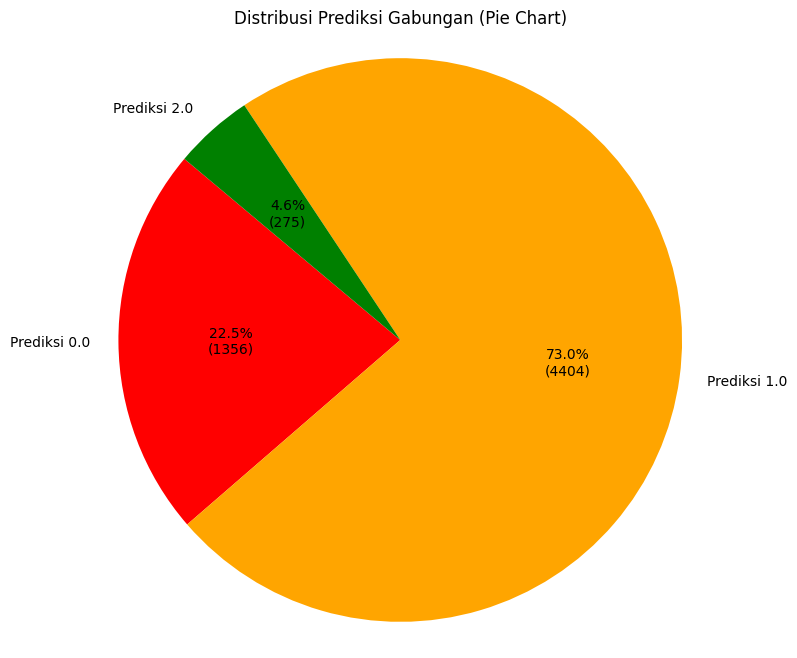

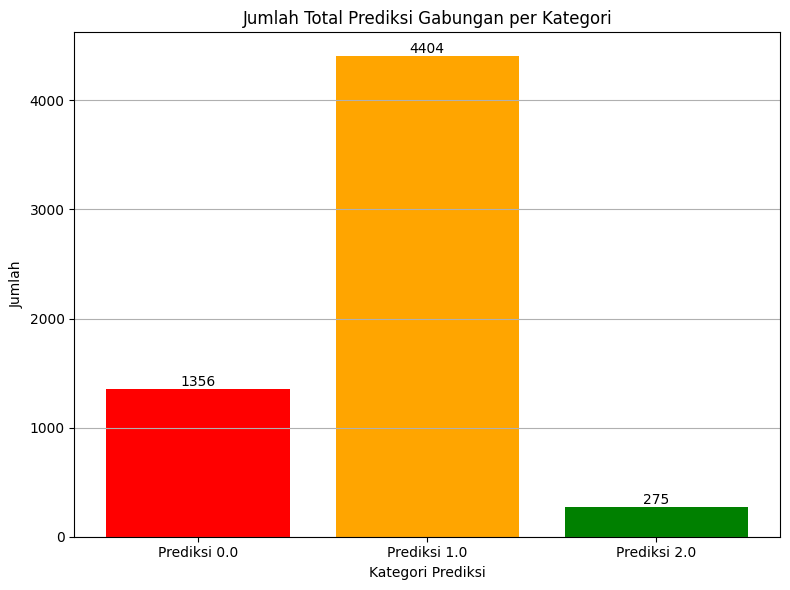

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Rentang tanggal yang diinginkan
start_date = pd.to_datetime('2025-02-20').date()
end_date = pd.to_datetime('2025-02-28').date()

file_paths = [
    'hasil_prediksi_gabungan/01_twetter.xlsx',
    'hasil_prediksi_gabungan/02_instagram.xlsx',
    'hasil_prediksi_gabungan/03_tiktok.xlsx'
]

all_data = []
for path in file_paths:
    df = pd.read_excel(path)

    # Pastikan kolom 'Date' sudah ada
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.date
        df = df[df['Date'].between(start_date, end_date)]  # Filter tanggal
        all_data.append(df)
    else:
        print(f"⚠️ Kolom 'Date' tidak ditemukan di file: {path}")

combined_df = pd.concat(all_data, ignore_index=True)

# Hitung jumlah prediksi per tanggal
count_per_day = combined_df.groupby(['Date', 'Prediksi']).size().unstack(fill_value=0)
count_per_day = count_per_day.sort_index()

# Simpan hasil perkembangan ke file Excel
os.makedirs('hasil_per_tanggal', exist_ok=True)
output_excel_path = 'hasil_per_tanggal/04_all_aggregated_per_date.xlsx'
count_per_day.to_excel(output_excel_path)
print(f'Data perkembangan sentimen per tanggal berhasil disimpan di: {output_excel_path}')

# Visualisasi garis
color_map = {0: 'red', 1: 'orange', 2: 'green'}
label_map = {0: 'Negative', 1: 'Netral', 2: 'Positive'}

plt.figure(figsize=(12, 6))
for label in count_per_day.columns:
    if label in color_map:
        plt.plot(count_per_day.index, count_per_day[label], label=label_map[label], color=color_map[label])

plt.title('Sentimen Analisis Gabungan')
plt.xlabel('Tanggal Komentar')
plt.ylabel('Jumlah')
plt.legend(title='Kategori Prediksi')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Pie chart total
def autopct_format(pct, all_vals):
    absolute = int(round(pct/100.*sum(all_vals)))
    return f'{pct:.1f}%\n({absolute})'

total_prediksi = combined_df['Prediksi'].value_counts().sort_index()
filtered_prediksi = total_prediksi[total_prediksi.index.isin([0, 1, 2])]
colors = [color_map[i] for i in filtered_prediksi.index]
labels = [f'Prediksi {i}' for i in filtered_prediksi.index]

plt.figure(figsize=(8, 8))
plt.pie(
    filtered_prediksi,
    labels=labels,
    colors=colors,
    autopct=lambda pct: autopct_format(pct, filtered_prediksi),
    startangle=140
)
plt.title('Distribusi Prediksi Gabungan (Pie Chart)')
plt.axis('equal')
plt.show()

# Bar chart total
values = filtered_prediksi.values
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

plt.title('Jumlah Total Prediksi Gabungan per Kategori')
plt.xlabel('Kategori Prediksi')
plt.ylabel('Jumlah')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
